In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Firstly loading the keras dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10. load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

pictures - 50000
matrix size - 32*32
rgb - 3

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
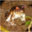

In [ ]:
x_train[0]

In [ ]:
y_train[0]

array([6], dtype=uint8)

let's print first 10 elements of y_train

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

so we need to flatten this array elements
-1 is used for no impact on the first dimension

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
y_train[0]

6

In [ ]:
labels = ["airplane ", " automobile ", " bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize = (10, 10))
    plt.imshow(x[index])
    plt.xlabel(labels[y[index]], fontsize = 30)

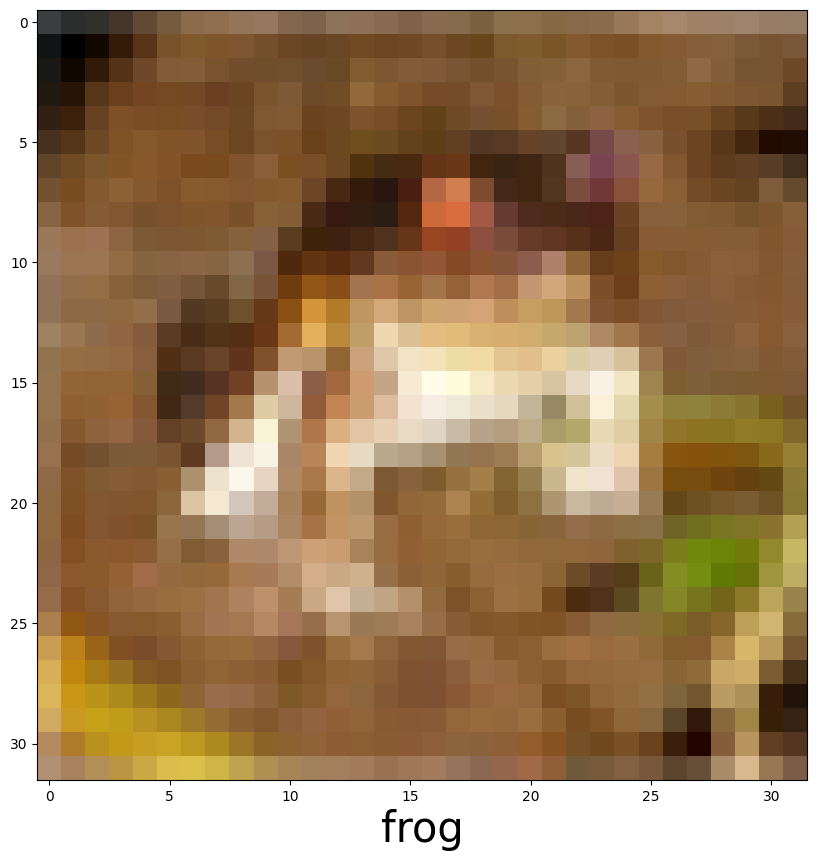

In [ ]:
plot_sample(x_train, y_train, 0)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:


ann = models.Sequential([
  layers.Flatten(input_shape=(32, 32, 3)),
  layers.Dense(1000, activation='relu'),
  layers.Dense(1000, activation='relu'),
  layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 53s 33ms/step - loss: 1.8400 - accuracy: 0.3444
Epoch 2/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6491 - accuracy: 0.4203
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5681 - accuracy: 0.4481
Epoch 4/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5078 - accuracy: 0.4681
Epoch 5/5
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4620 - accuracy: 0.4847


In [ ]:

cnn = models.Sequential ([
  layers.Input(shape = (32, 32, 3)),
  layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),

  #dense
  layers.Flatten (),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])

In [ ]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4110 - accuracy: 0.4945
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0435 - accuracy: 0.6350
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8932 - accuracy: 0.6866
Epoch 4/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7861 - accuracy: 0.7262
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.6884 - accuracy: 0.7615
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6012 - accuracy: 0.7914
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.5192 - accuracy: 0.8191
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4483 - accuracy: 0.8428
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.3765 - accuracy: 0.8687
Epoch 10/10
1563/1563 [==============================] - 71s 46m